# Problem Statement:
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
# Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split   
from sklearn.tree import DecisionTreeClassifier    
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [4]:
data = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Random Forest\Company_Data.csv')

In [3]:
# view top 5 of the dataset
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Exploring the dataset

In [4]:
data.shape

(400, 11)

There are 400 instances and 7 variables

In [5]:
# view summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


There are no missing values

In [6]:
# checking duplicates
data.duplicated().any()

False

No duplicates found

# 1. Categorical Variable

In [5]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical varaibles are :\n\n', categorical)

There are 3 categorical variables

The categorical varaibles are :

 ['ShelveLoc', 'Urban', 'US']


In [8]:
data[categorical].head(3)

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes


In [9]:
# frequency counts of categorical variables
col_names = ['ShelveLoc', 'Urban', 'US']
for col in col_names:
    
    print(data[col].value_counts())

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Yes    282
No     118
Name: Urban, dtype: int64
Yes    258
No     142
Name: US, dtype: int64


# 2. Numerical Variable

In [6]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [11]:
data[numerical].head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13


## Converting Categorical Variable 'ShelveLoc' to Numerical variable

In [7]:
# converting 'ShelveLoc' column to numerical variable 
data['ShelveLoc'] = data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
data.head(3)

# Map in Python is a function that works as an iterator to return a result after applying a function to every item of an 
# iterable (tuple, lists, etc.).

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes


In [13]:
# Creating dummy variables
new_data = pd.get_dummies(data,columns=['Urban','US'], drop_first=True)

In [14]:
new_data.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1


Here, Sales is the Target variable

## Creating a new column for the Target Variable 'Sales'

In [15]:
new_data['Sales'].mean()

7.496325000000001

In [16]:
# creating a column 'company_val'
company_val = []
for value in data["Sales"]:
     if value<=7.49:
        company_val.append("low")
     else:
        company_val.append("high")

new_data["company_val"]= company_val

In [17]:
new_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,company_val
0,9.50,138,73,11,276,120,3,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,3,38,13,1,0,low


In [18]:
# count of the new varibale 'company_val'
new_data['company_val'].value_counts()

low     201
high    199
Name: company_val, dtype: int64

# Data Visualisation

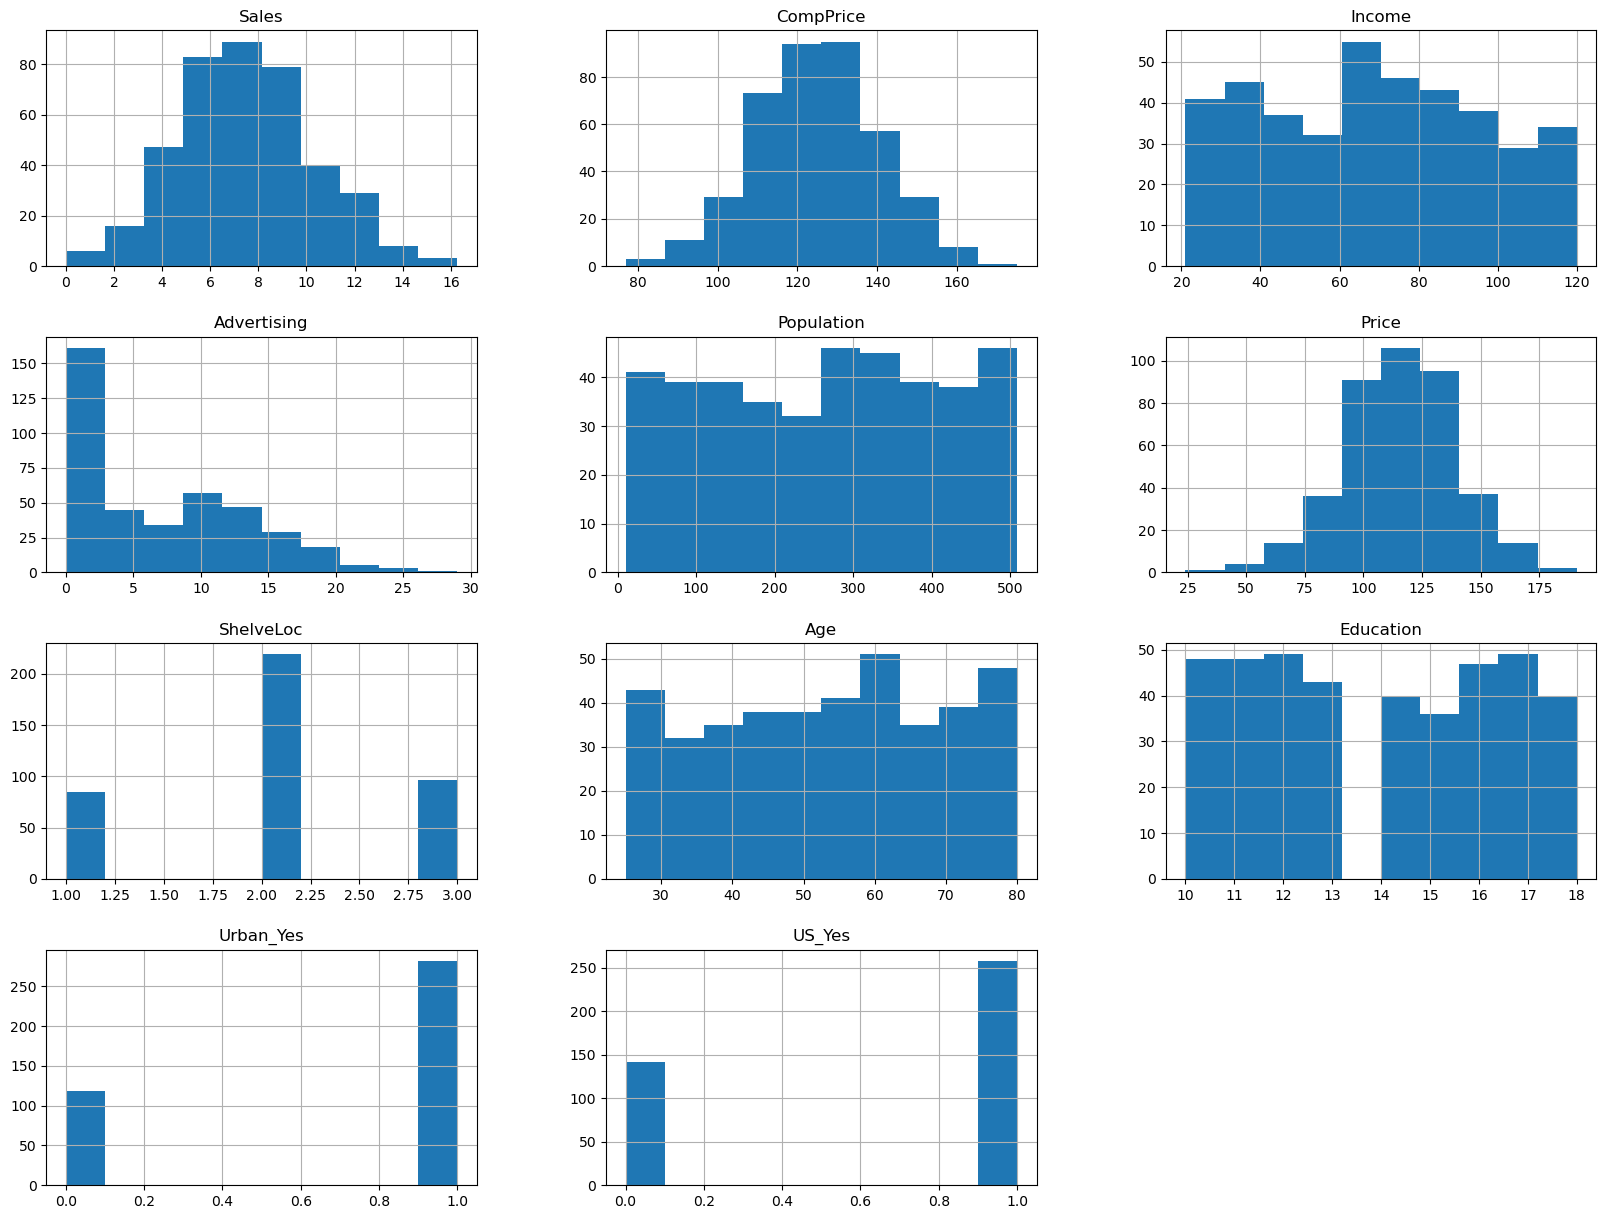

In [19]:
new_data.hist(figsize=(20,15))
plt.show()

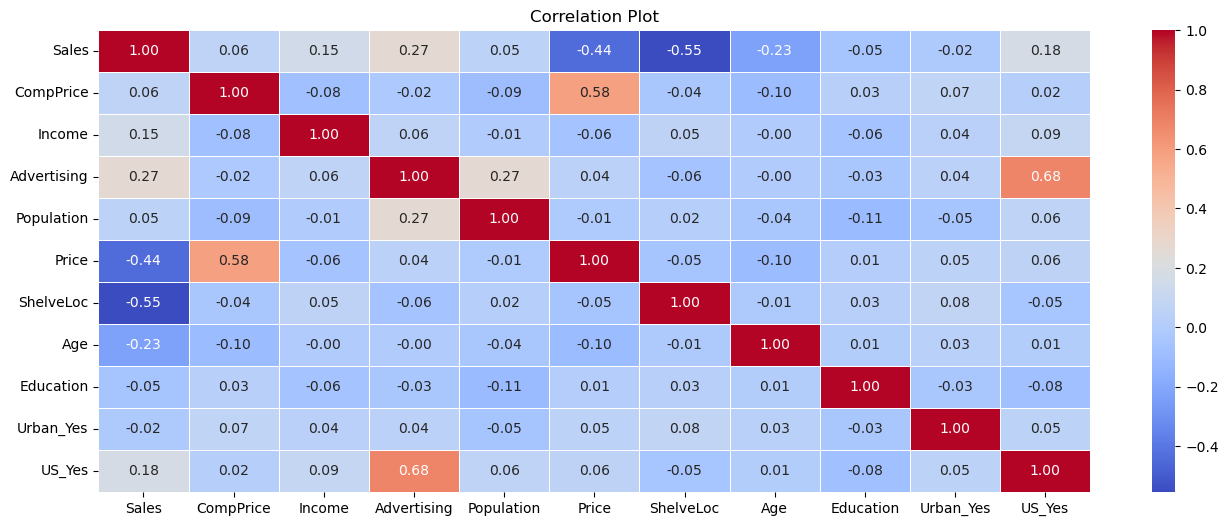

In [20]:
# checking correlation
correlation_matrix = new_data.corr()      
plt.figure(figsize=(16,6))        
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Plot")
plt.show()

# Declaring Feature Vector and Target Variable 

In [21]:
X = new_data.drop(['company_val','Sales'], axis =1)
y = new_data['company_val']

In [22]:
X.head(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1


In [23]:
y.head(3)

0    high
1    high
2    high
Name: company_val, dtype: object

In [24]:
y.unique()

array(['high', 'low'], dtype=object)

In [25]:
y.value_counts()

low     201
high    199
Name: company_val, dtype: int64

# Split Data into Training and Testing Set

In [26]:
# spliting data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [27]:
# checking the shape of X_train and X_test
X_train.shape, X_test.shape

((280, 10), (120, 10))

In [28]:
# checking statistical data
new_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,2.027500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,1.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,2.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,3.000000,80.000000,18.000000,1.000000,1.000000


Since there is a huge difference in mean between 'population' and 'Urban', 'US' and others as well, so we will normalise it.

In [29]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled

array([[-0.23766408, -0.32187744,  0.25945921, ..., -0.32161305,
        -1.48942633,  0.78050971],
       [-0.61901619, -0.07505436, -0.97974897, ...,  1.20468618,
        -1.48942633, -1.28121405],
       [ 1.41486172,  0.24228959,  1.03396433, ..., -1.46633748,
         0.67139944,  0.78050971],
       ...,
       [-0.36478145, -1.45021148, -0.97974897, ..., -1.46633748,
         0.67139944, -1.28121405],
       [ 0.46148145,  1.22958188,  2.1182715 , ..., -1.08476267,
         0.67139944,  0.78050971],
       [-0.74613356, -1.59125324, -0.97974897, ...,  0.82311137,
        -1.48942633, -1.28121405]])

In [31]:
X_test_scaled

array([[-1.69951383, -1.62651368,  0.72416228, ..., -1.08476267,
        -1.48942633,  0.78050971],
       [-0.23766408,  0.66541486,  0.56926126, ..., -1.46633748,
         0.67139944,  0.78050971],
       [-0.68257487, -1.02708622,  1.03396433, ...,  0.82311137,
         0.67139944,  0.78050971],
       ...,
       [ 1.35130304, -1.45021148,  0.72416228, ..., -1.46633748,
         0.67139944,  0.78050971],
       [-0.61901619, -1.34443017,  3.04767764, ..., -0.32161305,
         0.67139944,  0.78050971],
       [-0.1741054 ,  0.06598739,  0.10455819, ...,  0.82311137,
        -1.48942633,  0.78050971]])

We are now ready with the training and testing set for building the model

# Random Forest Classifier model with default parameters

In [32]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

In [34]:
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [36]:
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with default parameter decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# evaluating the accuracy of the model's predictions on the test set.
# The accuracy_score function compares the true labels (y_test) with the predicted labels (y_pred) and calculates the accuracy
# of the model.

Model accuracy score with default parameter decision-trees : 0.7917


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

# Random Forest Classifier Model with parameter n_estimators = 100

In [38]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [39]:
# fit the model to the training set
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [40]:
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

In [75]:
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7917


Accuracy is calculated as 0.79.

# Finding important features to improve Accuracy

In [41]:
# creating the classifier with n_estimators/defines the number of trees in the forest = 100, 
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [42]:
# fitting the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
# viewing the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Price          0.266083
Age            0.137073
CompPrice      0.123832
ShelveLoc      0.122425
Population     0.097503
Advertising    0.089553
Income         0.089341
Education      0.049025
Urban_Yes      0.016198
US_Yes         0.008968
dtype: float64

We can see that the most important feature is 'Price' and least important features are 'Urban' and 'US'.

# Visualizing the feature scores of the features

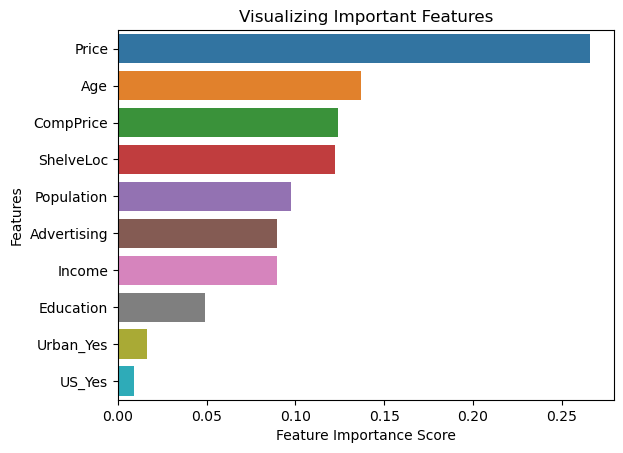

In [44]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# adding labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# adding title to the graph
plt.title("Visualizing Important Features")

# visualizing the graph
plt.show()

# Rebuilding Random Forest Model on selected features

In [45]:
# droping some of the least important features to rebuild the model and check its effect on accuracy.

# declaring feature vector and target variable
X = new_data.drop(['company_val', 'Education', 'Urban_Yes', 'US_Yes'], axis=1)
y = new_data['company_val']

In [46]:
X.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age
0,9.50,138,73,11,276,120,3,42
1,11.22,111,48,16,260,83,1,65
2,10.06,113,35,10,269,80,2,59


In [47]:
# splitting data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# Rebuilding the Random Forest Model and evaluating accuracy

In [48]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)

In [49]:
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
# Predict on the test set results
y_pred = clf.predict(X_test)

In [51]:
# Check accuracy score 
print('New Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

New Model accuracy score : 1.0000


The accuracy of the Model has increased from 0.79 to 1.00 after extracting some features

# Confusion Matrix

In [52]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[65  0]
 [ 0 55]]


There is only True Positive and True Negative in the matrix, proving to be the best accuracy.

# Classification Report

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00        65
         low       1.00      1.00      1.00        55

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



The accuracy is found to be perfect.

# Conclusions:
1. Built and Trained a Random Forest Classifier Model to predict sale of cloth.
2. Necessary EDA was carried out and visualized using the plot.
3. Estimted Accuracy using default parameter and n_estimators and found out to be 0.79.
4. Checked feature scores and removed some of the least important features such as 'Urban', 'US' and 'Education' from the dataset.
5. Post removal of the features, the Accuracy Test Score was estimated as 1.00.
6. The accuracy score was also estimated using the confusion matrix and classification report. The Accuracy Score showed to be 1.00.
7. This proves out to be an exceptional Model and can be used to predict the sale of cloth.